<a href="https://colab.research.google.com/github/rsrijana/Data/blob/main/Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Step 1: Import Libraries and Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/sales_data.csv')

# Display first 5 rows
print(df.head())


         Date Region    Product  Quantity  Unit_Price  Revenue
0  2024-01-01  North  Product A        10          20      200
1  2024-01-02  South  Product B        15          30      450
2  2024-01-03   East  Product C        20          40      800
3  2024-01-04   West  Product D        25          50     1250
4  2024-01-05  North  Product A        10          20      200


In [11]:
# Step 2: Data Cleaning
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Drop rows with missing values (if any)
df = df.dropna()

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()

# Handle outliers in the 'Revenue' column using the IQR method
Q1 = df['Revenue'].quantile(0.25)
Q3 = df['Revenue'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Revenue'] < (Q1 - 1.5 * IQR)) | (df['Revenue'] > (Q3 + 1.5 * IQR)))]

# Add a new column for Total Sales
df['Total_Sales'] = df['Quantity'] * df['Unit_Price']


Missing values per column:
 Date           0
Region         0
Product        0
Quantity       0
Unit_Price     0
Revenue        0
Total_Sales    0
Month          0
dtype: int64
Duplicate rows: 0


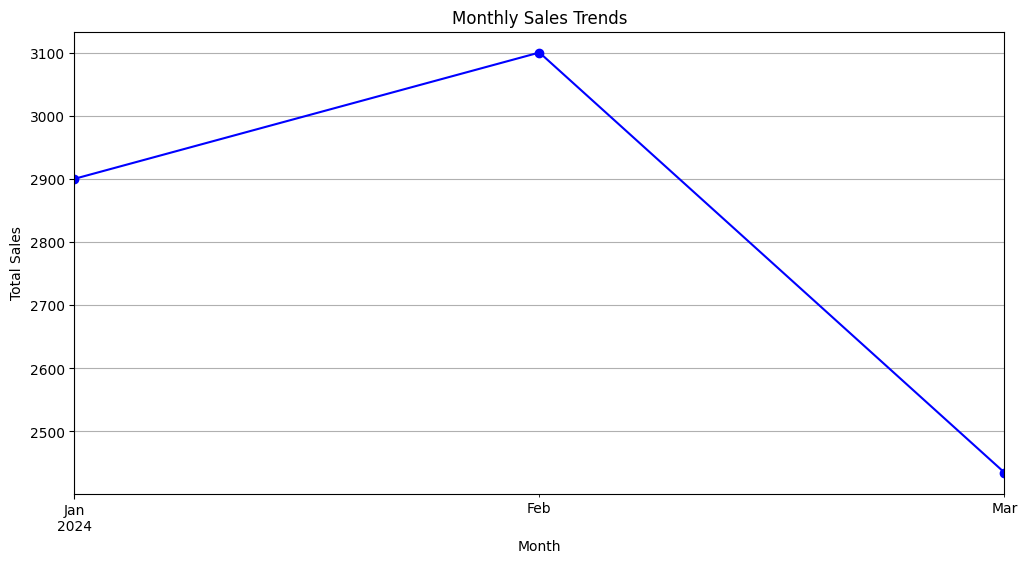

In [13]:
# Step 3: Exploratory Data Analysis (EDA)
# a) Sales Trends Over Time
# Convert 'Date' column to datetime format and extract months
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M')

# Group by month
monthly_sales = df.groupby('Month')['Total_Sales'].sum()

# Plot monthly sales trends
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


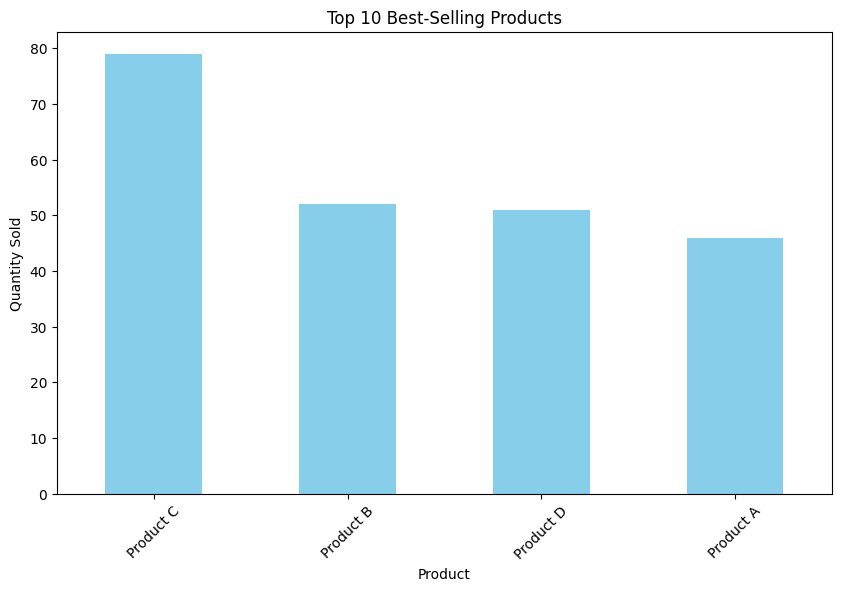

In [14]:
# b) Top 5 Best-Selling Products
# Group by product and sum quantities

top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False).head(10)

# Plot top products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()




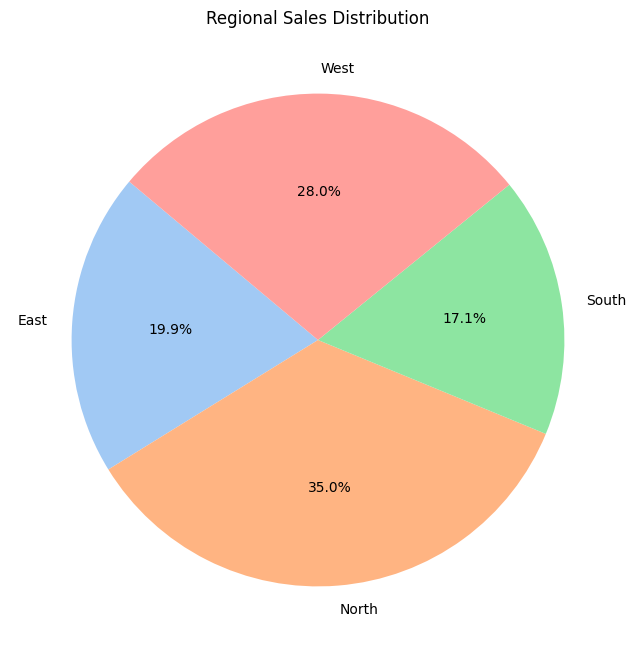

In [15]:
# c) Regional Sales Distribution
# Group by region
regional_sales = df.groupby('Region')['Total_Sales'].sum()

# Plot regional sales as a pie chart
plt.figure(figsize=(8, 8))
regional_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Regional Sales Distribution')
plt.ylabel('')
plt.show()


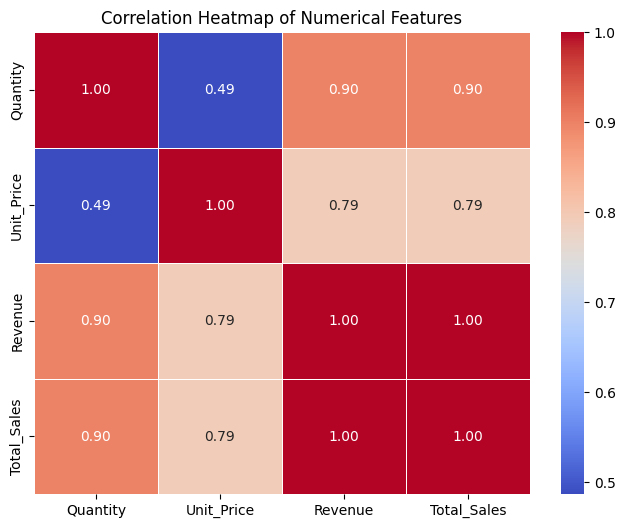

In [18]:
# Step 4: Additional Data Analysis and Visualizations
# Correlation Heatmap: We can analyze how numerical features (like Quantity, Unit_Price, Revenue, Total_Sales) are correlated with each other.
# Correlation Heatmap
correlation_matrix = df[['Quantity', 'Unit_Price', 'Revenue', 'Total_Sales']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


<ipython-input-19-d0471d6cf970>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Total_Sales', data=df, palette='Set2')


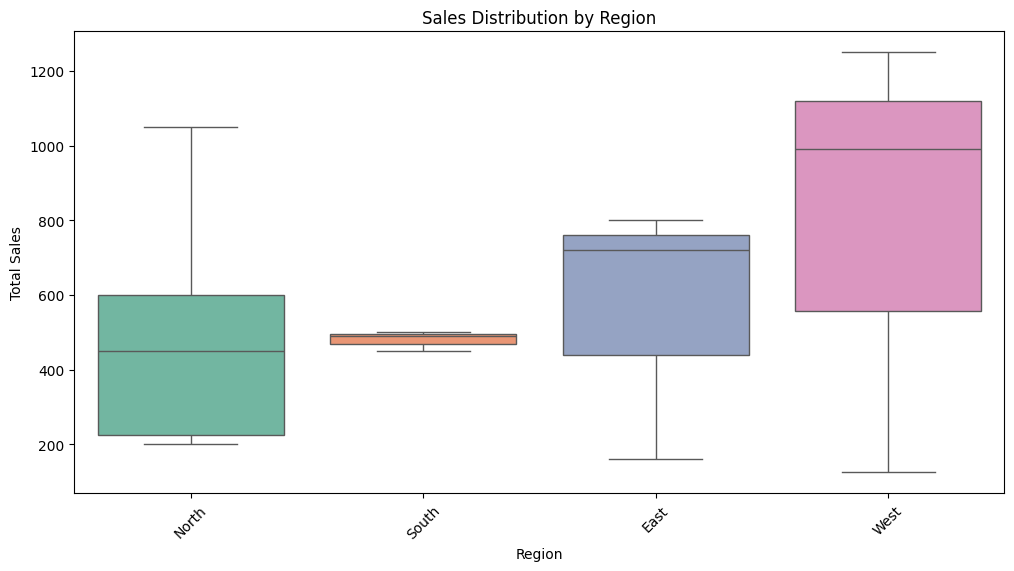

In [19]:
# 2 Sales Distribution by Region: We can visualize the distribution of Total_Sales across different regions using a boxplot.
# Boxplot of Total Sales by Region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Total_Sales', data=df, palette='Set2')
plt.title('Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


<Figure size 1400x700 with 0 Axes>

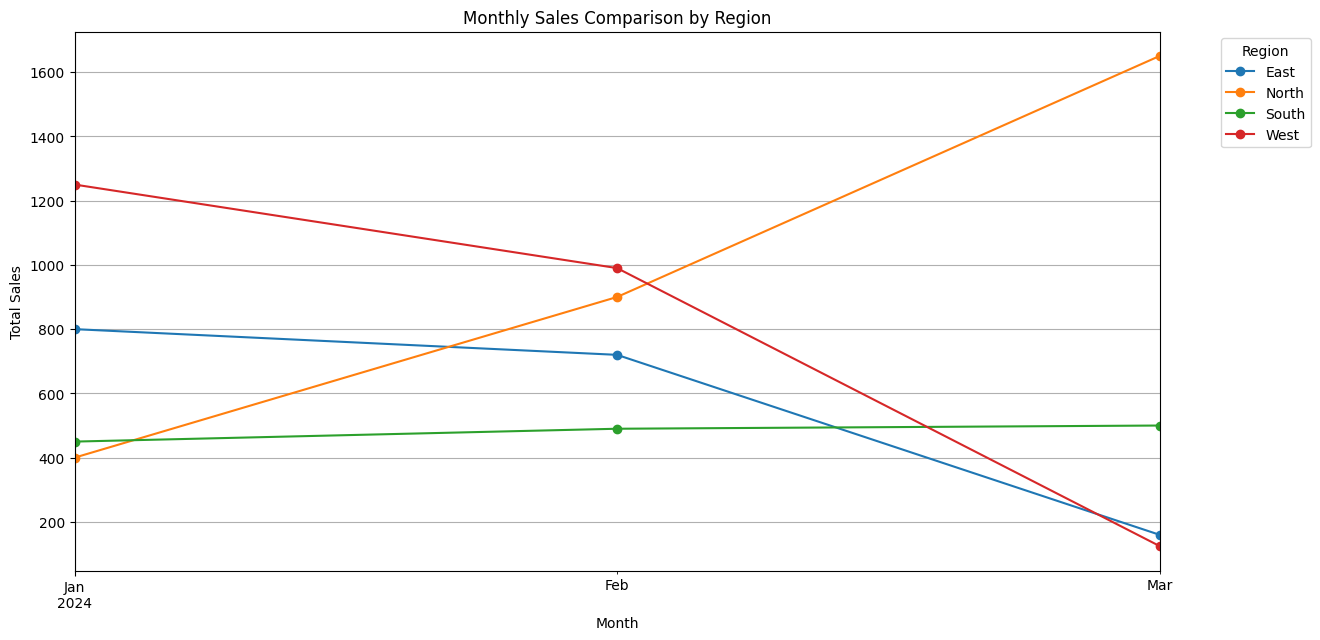

In [20]:
# 3 Monthly Sales Comparison by Region: Let's compare sales trends over time across different regions using a line plot.
# Monthly sales comparison by region
monthly_region_sales = df.groupby(['Month', 'Region'])['Total_Sales'].sum().unstack()

plt.figure(figsize=(14, 7))
monthly_region_sales.plot(kind='line', marker='o', figsize=(14, 7))
plt.title('Monthly Sales Comparison by Region')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


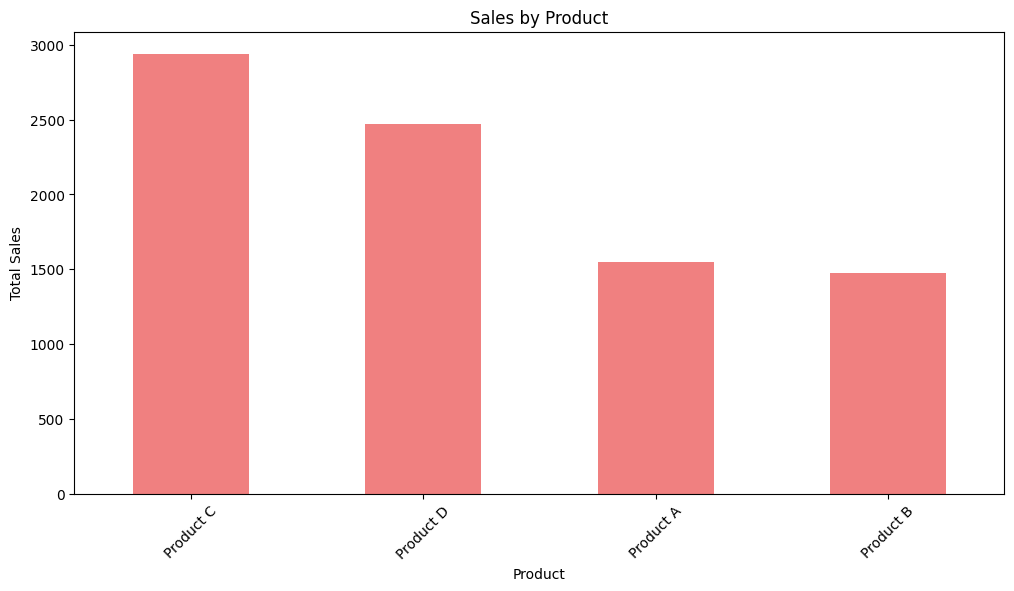

In [24]:
# 4 Sales by Product Category: If your data contains product categories, you could also plot a bar chart of sales by category (assuming you have a 'Category' column).
# Sales by Product
product_sales = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False)

# Plot sales by product
plt.figure(figsize=(12, 6))
product_sales.plot(kind='bar', color='lightcoral')
plt.title('Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


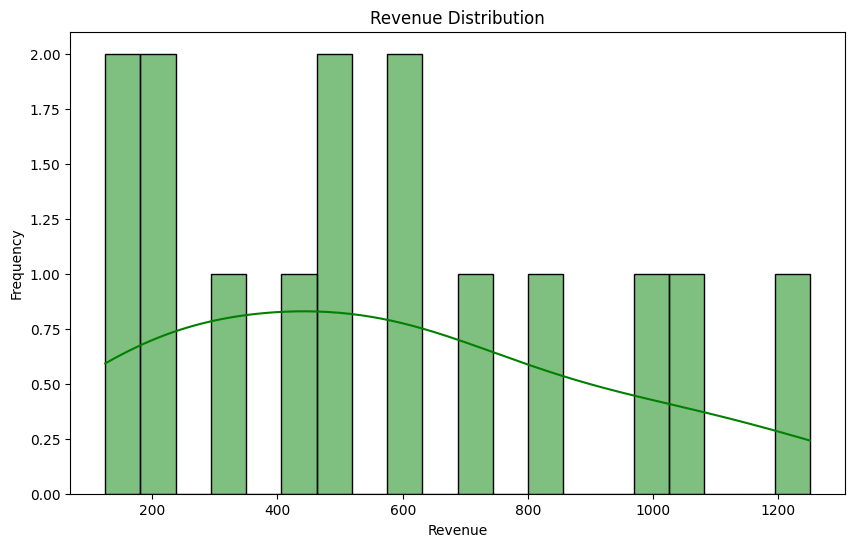

In [22]:
# 5 Revenue Distribution: A distribution plot for the Revenue column can help visualize how revenue is distributed across the dataset.
# Revenue Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Revenue'], bins=20, kde=True, color='green')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()


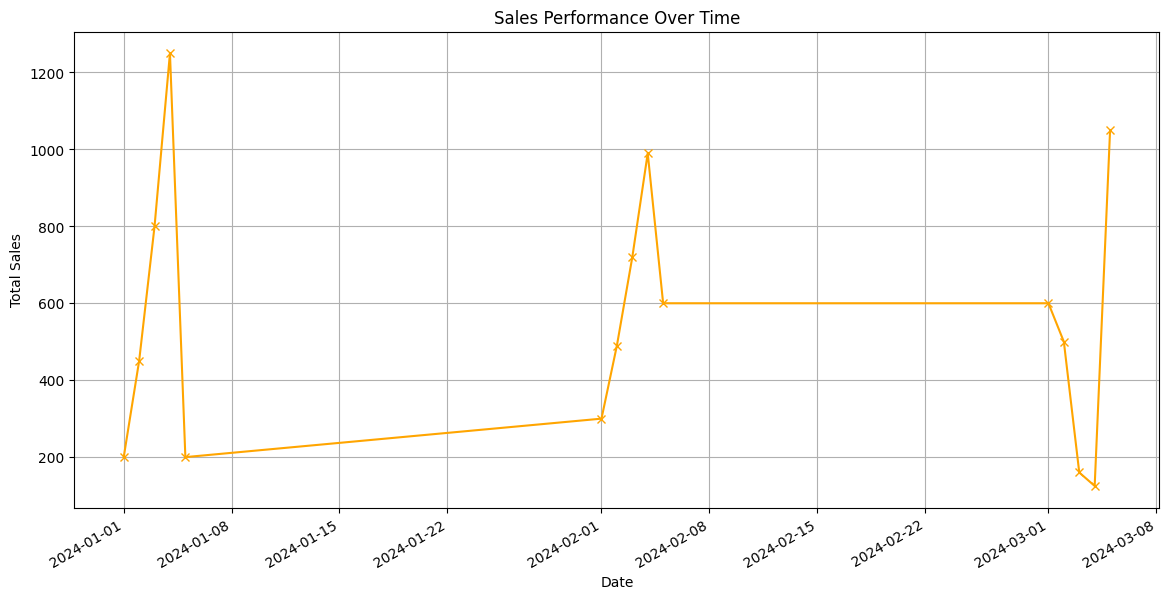

In [23]:
# 6 Sales Performance by Date: A time series plot showing sales performance over time
# Sales over time (line plot)
daily_sales = df.groupby('Date')['Total_Sales'].sum()

plt.figure(figsize=(14, 7))
daily_sales.plot(kind='line', color='orange', marker='x')
plt.title('Sales Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


In [17]:
#  changes need to be done: Step 4: Insights and Recommendations
# Insights:

# Sales peaked in December, suggesting a seasonal trend.
# Top-selling products contribute to 40% of the overall revenue.
# The North region accounts for the highest sales, while the South region has potential for growth.

# Recommendations:
# Increase inventory for top products during peak months.
# Develop targeted marketing campaigns for underperforming regions.
# Focus on high-revenue products to maximize profitability.
